# Customer Segmentation

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
# finding number of rows and columns
df.shape

(200, 5)

In [4]:
# getting information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# columns in the dataset
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
#checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# checking whether the data contains duplicates
df.duplicated().sum()

0

In [8]:
#Statistical information abou the dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Visualization

#### Univariate analysis

In [9]:
df.drop(columns=['CustomerID'],axis=1,inplace = True)

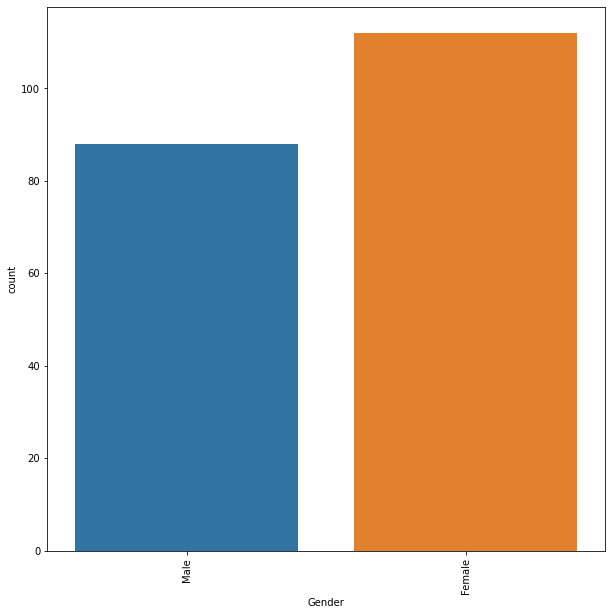

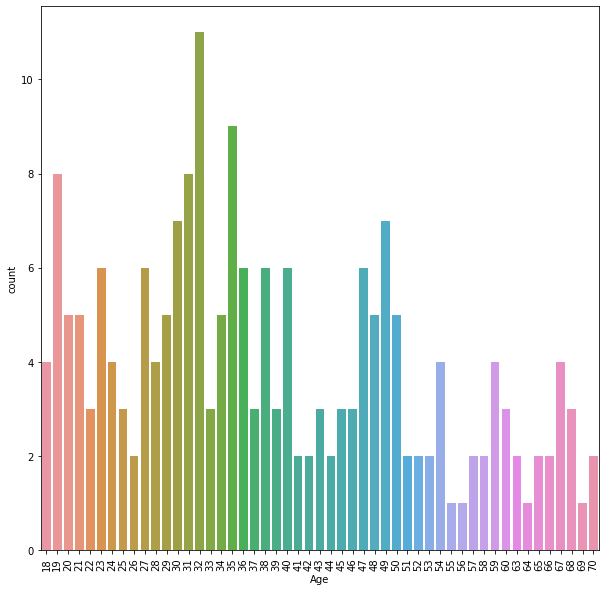

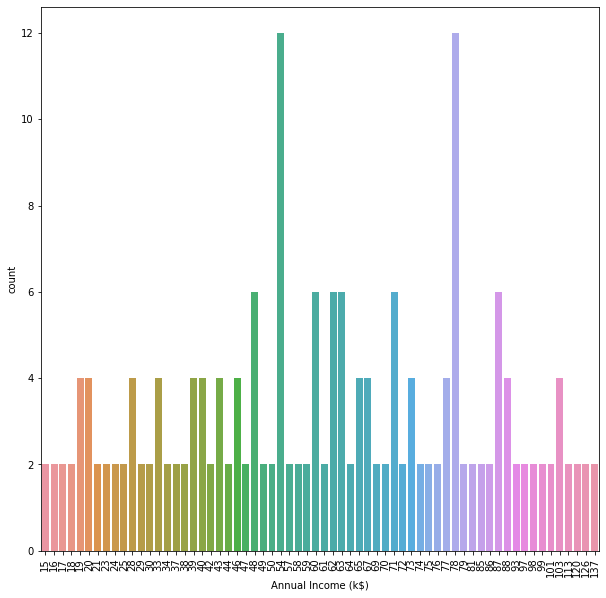

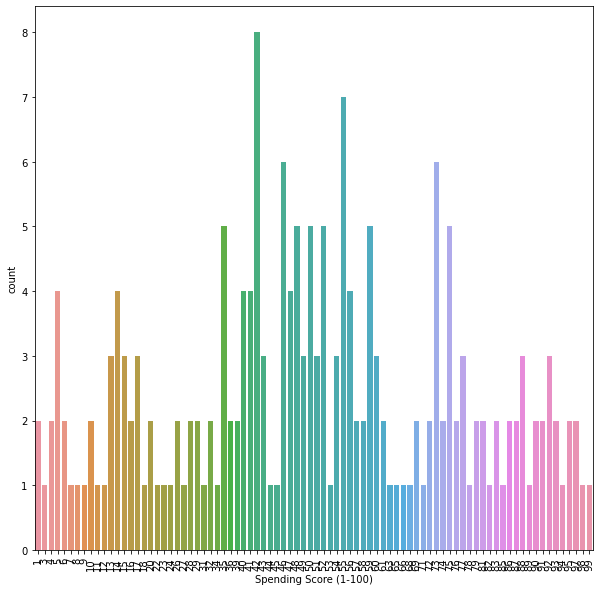

In [10]:
for i in df:
    plt.figure(figsize=(10,10))
    sns.countplot(data=df,x=df[i])
    plt.xticks(rotation=90)
    plt.show()

- from data number of female customers are very much higher compaired to male customers.
- customers aged between 19 & 50 are more.
- customers are more with salary 54k and 78k.
- most spending score lies between 30 & 60.

<Figure size 720x720 with 0 Axes>

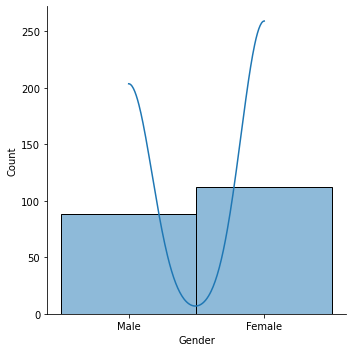

<Figure size 720x720 with 0 Axes>

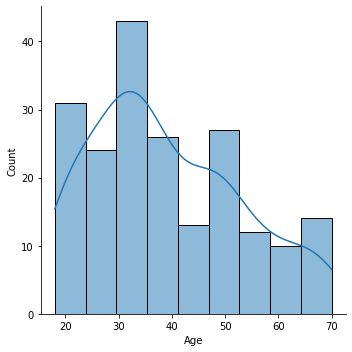

<Figure size 720x720 with 0 Axes>

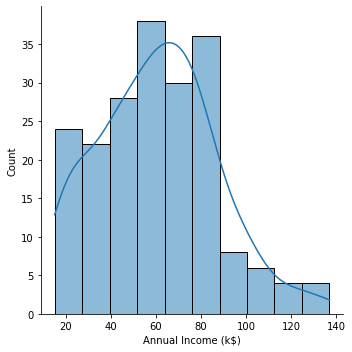

<Figure size 720x720 with 0 Axes>

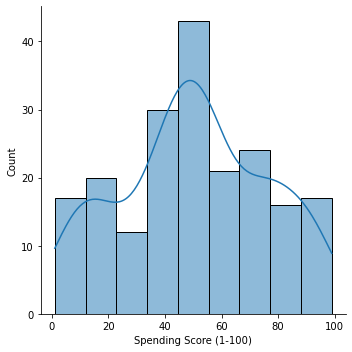

In [11]:
for i in df:
    plt.figure(figsize=(10,10))
    sns.displot(df[i],kde=True)

#### Bivariate Analysis 

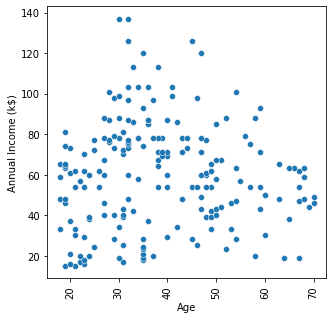

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='Age',y='Annual Income (k$)')
plt.xticks(rotation=90)
plt.show()

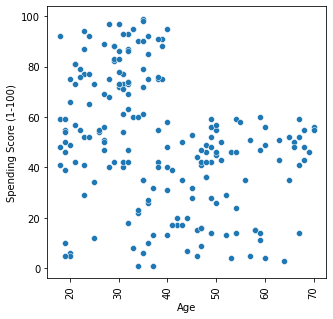

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)')
plt.xticks(rotation=90)
plt.show()

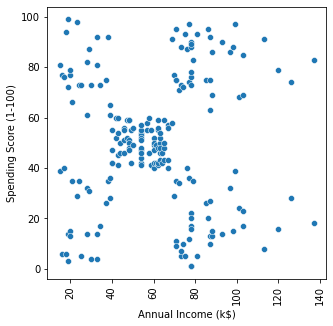

In [14]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:>

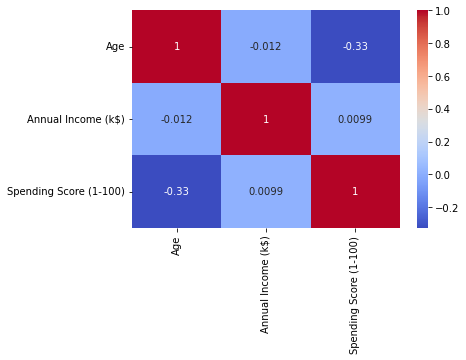

In [15]:
# Checking Corelation
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

# Clustering

### 2-Dimensional Clustering 

#### Clustering between  Age and Spending Score

In [16]:
df1 = df[['Age','Spending Score (1-100)']]
from sklearn.cluster import KMeans
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)

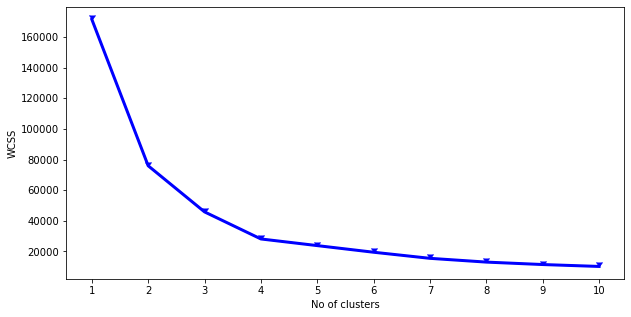

In [17]:
#plot for elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1,11),SSE)
plt.plot(range(1,11),SSE,linewidth=3,color='blue',marker=7)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [18]:
km = KMeans(n_clusters = 4)
km.fit(df1)
y=km.predict(df1)
df1['Label'] = y
df1.head(5)

,Age,Spending Score (1-100),Label
0,19,39,3
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,3


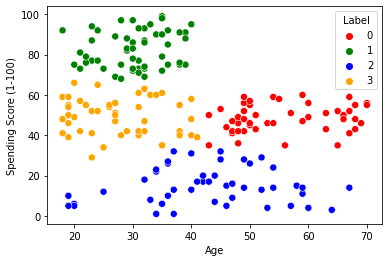

In [26]:
sns.scatterplot(data=df1,x='Age',y='Spending Score (1-100)',hue='Label',palette=['red','green','blue','orange'],s=50)
plt.show()

#### Clustering between Annual Income and Spending Score

In [20]:
df2 =df[['Spending Score (1-100)','Annual Income (k$)']]
df2.head(5)

,Spending Score (1-100),Annual Income (k$)
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


In [21]:
SSE2=[]
for i in range(1,11):
    kmeans2 = KMeans(n_clusters = i)
    kmeans2.fit(df2)
    SSE2.append(kmeans2.inertia_)

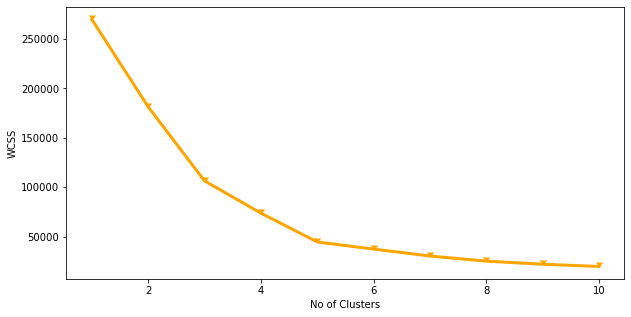

In [22]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),SSE2)
plt.plot(range(1,11),SSE2,linewidth = 3, color='orange',marker = 7)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
km2 = KMeans(n_clusters = 5)
km2.fit(df2)
y2 = km2.predict(df2)
df2['Label2'] = y2
df2.head(5)

,Spending Score (1-100),Annual Income (k$),Label2
0,39,15,2
1,81,15,4
2,6,16,2
3,77,16,4
4,40,17,2


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

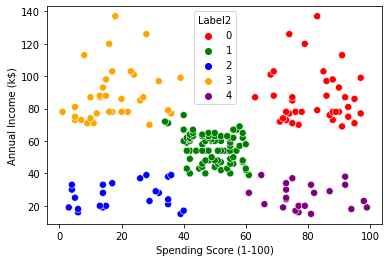

In [25]:
sns.scatterplot(data=df2,y='Annual Income (k$)',x='Spending Score (1-100)',hue='Label2',palette=['red','green','blue','orange','purple'],s=50)
plt.show()

### 3-Dimensional Clustering

#### Clustering between Age, Annual Income and Spending Score

In [27]:
df3=df[['Age','Spending Score (1-100)','Annual Income (k$)']]
df3.head(5)

,Age,Spending Score (1-100),Annual Income (k$)
0,19,39,15
1,21,81,15
2,20,6,16
3,23,77,16
4,31,40,17


In [28]:
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df3)
    SSE.append(kmeans.inertia_)

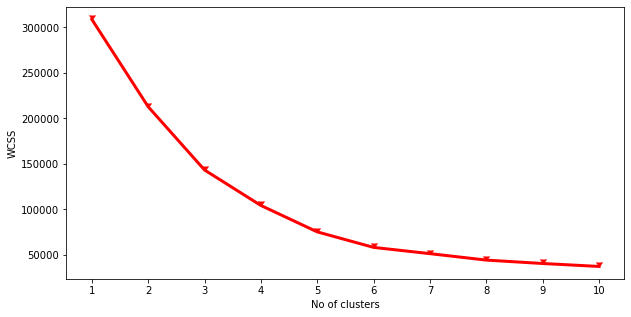

In [29]:
plt.figure(figsize=(10,5))
plt.plot(range(1,11),SSE)
plt.plot(range(1,11),SSE,linewidth=3,color='red',marker=7)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [30]:
km = KMeans(n_clusters = 5)
km.fit(df3)
y=km.predict(df3)
df3['Label'] = y
df3.head(5)

,Age,Spending Score (1-100),Annual Income (k$),Label
0,19,39,15,4
1,21,81,15,0
2,20,6,16,4
3,23,77,16,0
4,31,40,17,4


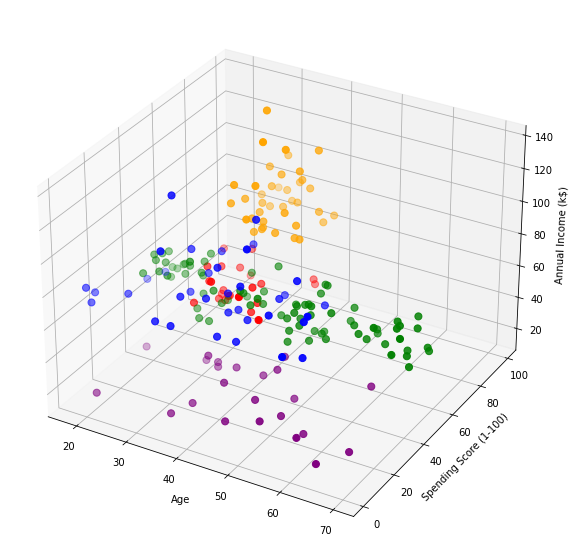

In [33]:
# scatter plot
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(df3['Age'][df3['Label']==0],df3['Spending Score (1-100)'][df3['Label']==0],df3['Annual Income (k$)'][df3['Label']==0],c='red',s=50)
ax.scatter(df3['Age'][df3['Label']==1],df3['Spending Score (1-100)'][df3['Label']==1],df3['Annual Income (k$)'][df3['Label']==1],c='green',s=50)
ax.scatter(df3['Age'][df3['Label']==2],df3['Spending Score (1-100)'][df3['Label']==2],df3['Annual Income (k$)'][df3['Label']==2],c='blue',s=50)
ax.scatter(df3['Age'][df3['Label']==3],df3['Spending Score (1-100)'][df3['Label']==3],df3['Annual Income (k$)'][df3['Label']==3],c='orange',s=50)
ax.scatter(df3['Age'][df3['Label']==4],df3['Spending Score (1-100)'][df3['Label']==4],df3['Annual Income (k$)'][df3['Label']==4],c='purple',s=50)
ax.set_xlabel('Age')
ax.set_ylabel('Spending Score (1-100)')
ax.set_zlabel('Annual Income (k$)')
plt.show()

From above graphs we can observe the scattering of the dataset depending on its each attributes. Using colors it will help us to easily identify clusters and clustering points.
